/home/user/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


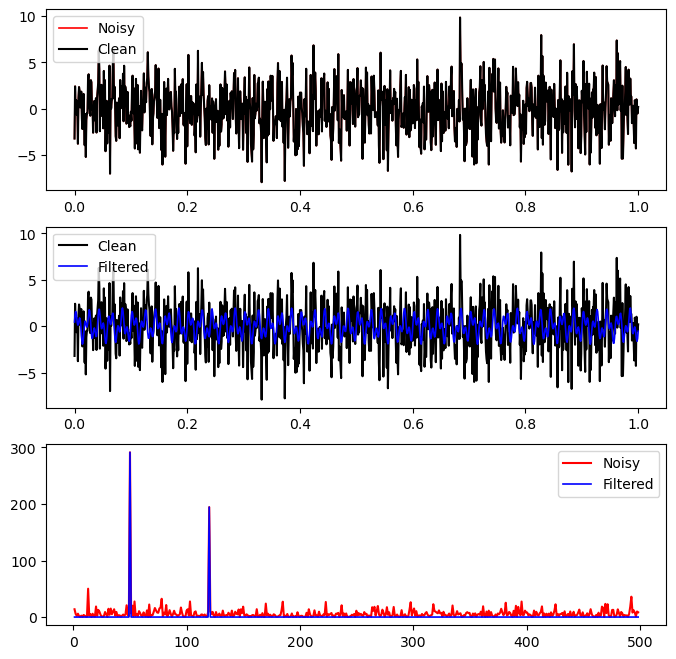

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.001
t = np.arange(0, 1 + dt, dt)
f = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t) # Sum of 2 frequencies
f = f + 2.5 * np.random.randn(len(t)) # Add some noise

# Compute the Fast Fourier Transform FFT
n = len(t)
fhat = np.fft.fft(f, n)
PSD = fhat * np.conj(fhat) / n # Power spectrum (power per freq)
freq = 1 / (dt * n) * np.arange(0, n) # Create x-axis of frequencies in Hz
L = np.arange(1, np.floor(n/2), dtype=int) # Only plot the first half of freqs

# Use the PSD to filter out noise
indices = PSD > 100 # Find all freqs with large power
PSDclean = PSD * indices # Zero out all others
fhat = indices * fhat # Zero out small Fourier coeffs. in Y
ffilt = np.fft.ifft(fhat) # Inverse FFT for filtered time signal

# PLOTS
plt.figure(figsize=(8, 8))

plt.subplot(3, 1, 1)
plt.plot(t, f, 'r', linewidth=1.2)
plt.plot(t, f, 'k', linewidth=1.5)
plt.legend(['Noisy', 'Clean'])

plt.subplot(3, 1, 2)
plt.plot(t, f, 'k', linewidth=1.5)
plt.plot(t, ffilt, 'b', linewidth=1.2)
plt.legend(['Clean', 'Filtered'])

plt.subplot(3, 1, 3)
plt.plot(freq[L], PSD[L], 'r', linewidth=1.5)
plt.plot(freq[L], PSDclean[L], '-b', linewidth=1.2)
plt.legend(['Noisy', 'Filtered'])

plt.show()
